In [2]:
#TODO: add stops to the training for loss loops

import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset
import itertools

class Ti:
    
    def createOneHot(n, num_items):
        pos = n-1
        oneHot = [0]* num_items
        oneHot[pos] = 1
        return oneHot

    #create individual object vectors all in one array
    def createData(n):
        data = []
        for i in range(n):
            oneHot = [0]*n
            oneHot[i] = 1
            data.append(oneHot)
        return data
    
    #create concatenated vector based on two oneHot vectors from scalars
    def createInput(array):
        inputData = []
        for i in range(len(array) - 1):
            inputData.append(array[i] + array[i+1])
        return inputData
    #create reverse concatenated vector
    def createInputReverse(array):
        inputData = []
        for i in range(len(array) - 1):
            inputData.append(array[i+1] + array[i])
        return inputData
    
    #fully concatenated? 
    def createInputTotal(array):
        input = Ti.createInput(array)
        inputReverse = Ti.createInputReverse(array)
        return input + inputReverse
    
    #creates all labels based on an array of values  
    def createLabels(array):
        forwardArr = Ti.createInput(array)
        reverseArr = Ti.createInputReverse(array)
        forwardLabel = [1] * len(forwardArr)
        reverseLabel = [-1] * len(reverseArr)
        return forwardLabel + reverseLabel 
    
    #creates testset (unused)
    def createTest(array):      
        testSet = []
        for i in array:
            for j in array:
                concatenated = i + j #remove equal vectors
                testSet.append(concatenated)
        return testSet

## TESTING

num_items = 7
data = Ti.createData(num_items)
print("Data: ", data)
input = Ti.createInput(data)
print("Input: ", input)
inputReverse = Ti.createInputReverse(data)
print("Input Reverse: ", inputReverse)

inputTotal = Ti.createInputTotal(data)
print("Total Input: ", inputTotal)

labels = Ti.createLabels(inputTotal)
print("Labels: ", labels)

tensorArray = torch.tensor(data)
print(tensorArray)

tensorLabels = torch.tensor(labels)
print('tensorLabels:', tensorLabels)

tensorInputTotal = torch.tensor(inputTotal)
print(tensorInputTotal)

tensorCreateTest = torch.tensor(Ti.createTest(data))
print(tensorCreateTest)


Data:  [[1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1]]
Input:  [[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]]
Input Reverse:  [[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]]
Total Input:  [[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]

In [3]:
# class Tib(Ti):
    
#     #untouched methods
#     def createOneHot(n):

#     #create concatenated vector based on two oneHot vectors from scalars
#     def createInput(array):
#         inputData = []
#         for i in range(len(array) - 1):
#             inputData.append(array[i] + array[i+1])
#         return inputData
#     #create reverse concatenated vector
#     def createInputReverse(array):
#         inputData = []
#         for i in range(len(array) - 1):
#             inputData.append(array[i+1] + array[i])
#         return inputData
    
#     #fully concatenated? 
#     def createInputTotal(array):
#         input = Ti.createInput(array)
#         inputReverse = Ti.createInputReverse(array)
#         return input + inputReverse
    
#     #creates all labels based on an array of values  
#     def createLabels(array):
#         forwardArr = Ti.createInput(array)
#         reverseArr = Ti.createInputReverse(array)
#         forwardLabel = [1] * len(forwardArr)
#         reverseLabel = [-1] * len(reverseArr)
#         return forwardLabel + reverseLabel 
    
#     #creates testset (unused)
#     def createTest(array):      
#         testSet = []
#         for i in array:
#             for j in array:
#                 concatenated = i + j #remove equal vectors
#                 testSet.append(concatenated)
#         return testSet


In [4]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset
import itertools
import torch.nn.functional as F

item_indices = torch.arange(num_items)  # Indices for items 'A', 'B', 'C'
one_hot_vectors = F.one_hot(item_indices, num_classes = num_items) #creates one hot vectors more easily than above in a tensor

testSet = []
testLabels = []
#creates testSet and testLabels more easily
#enumerate returns two values, the index, and the item in the array
#creates a testSet and testLabel for every single permutation of items
for idx_i, i in enumerate(one_hot_vectors):
    for idx_j, j in enumerate(one_hot_vectors):
            concatenated = torch.cat((i,j))
            testSet.append(concatenated.tolist())
            testLabels.append(int(idx_i < idx_j))
            print(idx_i, idx_j)
print('testLabels', testLabels)
print('testSet', testSet)
testSet = torch.tensor(testSet)
testLabels = torch.tensor(testLabels)
inputTotal = torch.tensor(Ti.createInputTotal(one_hot_vectors.tolist()))
labels = torch.tensor(Ti.createLabels(one_hot_vectors.tolist()))

print('One hot vectors: \n', one_hot_vectors)
print('Concatenated Input vectors: \n' ,inputTotal)
print('Labels: \n', labels)
print('Testing Set: \n', testSet)
print('Testing Labels: \n', testLabels)


0 0
0 1
0 2
0 3
0 4
0 5
0 6
1 0
1 1
1 2
1 3
1 4
1 5
1 6
2 0
2 1
2 2
2 3
2 4
2 5
2 6
3 0
3 1
3 2
3 3
3 4
3 5
3 6
4 0
4 1
4 2
4 3
4 4
4 5
4 6
5 0
5 1
5 2
5 3
5 4
5 5
5 6
6 0
6 1
6 2
6 3
6 4
6 5
6 6
testLabels [0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
testSet [[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 0

In [5]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torch.optim import Adam

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = inputTotal.float()
        self.labels = labels.float()
        self.test_dataset = testSet.float()

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        # Retrieve data and labels at the specified index
        x = self.data[index]
        y = self.labels[index]
        return x, y

dataset = CustomDataset(inputTotal, labels)
dataloader = DataLoader(dataset, batch_size=28, shuffle=True)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1*(2*num_items), 512),
            nn.ReLU(),
            nn.Linear(512, 1),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits
    
    
model = NeuralNetwork().to(device)
print(model)

loss_fn = nn.MSELoss()
learning_rate = 0.01
epochs = 10000

for epoch in range(epochs):
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(1))  # Make sure y has the same shape as pred

        model.zero_grad()
        loss.backward()

        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{len(dataloader.dataset):>5d}]")

print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

test_dataset = CustomDataset(testSet, testLabels)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

model.eval()
true_labels = []
predictions = []

with torch.no_grad():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        # Store the true labels and predictions
        true_labels.extend(y.tolist())
        predictions.extend(pred.round().tolist())

correct = sum(p == t for p, t in zip(predictions, true_labels))
print(correct)
accuracy = correct / len(true_labels)
print(f"Accuracy: {accuracy:.4f}")

# X = torch.tensor( [0, 0, 0, 0, 0, 0], dtype=torch.float32).unsqueeze(0).to(device)
# logits = model(X)
# predictions = torch.sign(torch.tanh(logits))
# print('prediction:', predictions)



Using cpu device
NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=14, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=1, bias=True)
  )
)
loss: 1.011700  [    0/   12]
loss: 1.000028  [    0/   12]
loss: 0.989664  [    0/   12]
loss: 0.980087  [    0/   12]
loss: 0.971004  [    0/   12]
loss: 0.962254  [    0/   12]
loss: 0.953740  [    0/   12]
loss: 0.945409  [    0/   12]
loss: 0.937231  [    0/   12]
loss: 0.929185  [    0/   12]
loss: 0.921261  [    0/   12]
loss: 0.913448  [    0/   12]
loss: 0.905743  [    0/   12]
loss: 0.898140  [    0/   12]
loss: 0.890635  [    0/   12]
loss: 0.883226  [    0/   12]
loss: 0.875910  [    0/   12]
loss: 0.868683  [    0/   12]
loss: 0.861543  [    0/   12]
loss: 0.854488  [    0/   12]
loss: 0.847516  [    0/   12]
loss: 0.840626  [    0/   12]
loss: 0.833812  [    0/   12]
loss: 0.827078  [    0/   12]
loss: 0.820419  [    0/   12]
loss: 0.813832  [    0/   12]
loss: 0.80

In [6]:
# Reads out test labels and model output
# testLabels.reshape(num_items,num_items)
# model(testSet.float()).reshape(num_items,num_items)

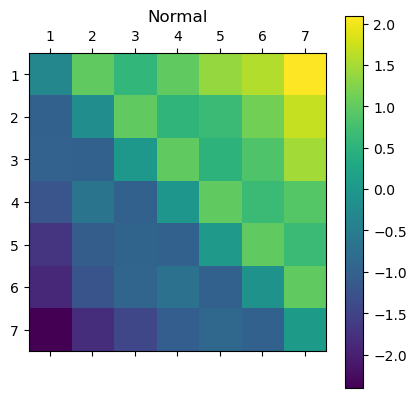

In [7]:
import matplotlib.pyplot as plt

# Assuming `model` and `testSet` are already defined
output = model(testSet.float()).reshape(num_items, num_items).detach()

# Plot the matrix with axes starting at 1
plt.matshow(output)

plt.title("Normal")
# Modify the ticks to start from 1
plt.xticks(range(num_items), range(1, num_items + 1))
plt.yticks(range(num_items), range(1, num_items + 1))

plt.colorbar()  # Optional: to add a color bar for reference
plt.show()

# plt.matshow(model(testSet.float()).reshape(num_items,num_items).detach())

In [8]:
model(torch.tensor([0,1,0,0,0,0,0,0,0,0,1,0,0,0]).float())

tensor([0.5409], grad_fn=<ViewBackward0>)

In [9]:
p = 5
q = 2

def exceptionData(p, q):
    # Create one-hot vectors for p and q
    exceptionVector = Ti.createOneHot(p,num_items) + Ti.createOneHot(q,num_items)
    exceptionVectorReverse = Ti.createOneHot(q,num_items) + Ti.createOneHot(p,num_items)
    
    # Concatenate the vectors directly
    combined_vectors = [exceptionVector, exceptionVectorReverse]  # This is a list of tensors
    
    # Use torch.cat to concatenate them into one tensor along the first dimension
    return combined_vectors

print(exceptionData(p, q))

tensorExceptionLabels = torch.tensor([1, -1])
tensorExceptionData = torch.tensor(exceptionData(p, q))

print(tensorExceptionData)
print(tensorExceptionLabels)

[[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]
tensor([[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])
tensor([ 1, -1])


In [10]:
dataset = CustomDataset(tensorExceptionData, tensorExceptionLabels)
dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)
model.train()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.1)

for epoch in range(epochs):
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(1))  # Make sure y has the same shape as pred

        model.zero_grad()
        loss.backward()

        with torch.no_grad():
            for param in model.linear_relu_stack[2].parameters():
                param -= learning_rate * param.grad

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{len(dataloader.dataset):>5d}]")

    scheduler.step(loss)  # Adjust the learning rate based on the loss

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

print(f"Model structure: {model}\n\n")


for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

test_dataset = CustomDataset(testSet, testLabels)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)


model.eval()
true_labels = []
predictions = []

with torch.no_grad():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        # Store the true labels and predictions
        true_labels.extend(y.tolist())
        predictions.extend(pred.round().tolist())

correct = sum(p == t for p, t in zip(predictions, true_labels))
print(correct)
accuracy = correct / len(true_labels)
print(f"Accuracy: {accuracy:.4f}")


loss: 0.999999  [    0/   12]
Epoch 1, Loss: 0.5887937545776367
loss: 2.166803  [    0/   12]
Epoch 2, Loss: 0.7630480527877808
loss: 0.165037  [    0/   12]
Epoch 3, Loss: 0.49525704979896545
loss: 0.818339  [    0/   12]
Epoch 4, Loss: 1.138122320175171
loss: 0.993172  [    0/   12]
Epoch 5, Loss: 1.4586118459701538
loss: 0.073497  [    0/   12]
Epoch 6, Loss: 0.39840075373649597
loss: 0.605577  [    0/   12]
Epoch 7, Loss: 0.18322855234146118
loss: 0.543763  [    0/   12]
Epoch 8, Loss: 0.3731566369533539
loss: 0.185527  [    0/   12]
Epoch 9, Loss: 0.09158632904291153
loss: 0.392767  [    0/   12]
Epoch 10, Loss: 0.0838848426938057
loss: 0.245431  [    0/   12]
Epoch 11, Loss: 0.3773983418941498
loss: 0.055349  [    0/   12]
Epoch 12, Loss: 0.004561625886708498
loss: 0.052326  [    0/   12]
Epoch 13, Loss: 0.12632974982261658
loss: 0.240973  [    0/   12]
Epoch 14, Loss: 0.25946420431137085
loss: 0.018282  [    0/   12]
Epoch 15, Loss: 0.2903434634208679
loss: 0.118309  [    0/   1

In [11]:
model(torch.tensor([0,0,0,0,1,0,0,0,1,0,0,0,0,0]).float())

tensor([0.2875], grad_fn=<ViewBackward0>)

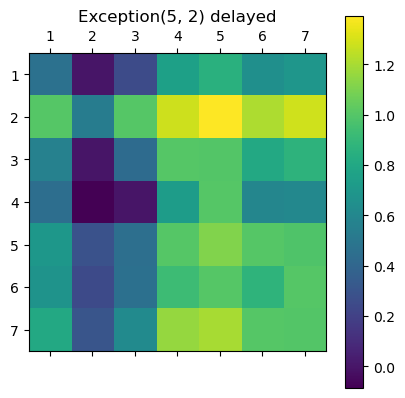

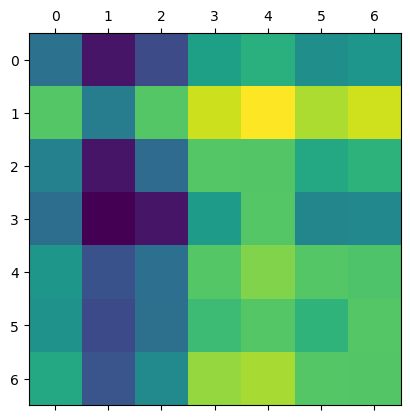

In [12]:
# Assuming `model` and `testSet` are already defined
output = model(testSet.float()).reshape(num_items, num_items).detach()

# Plot the matrix with axes starting at 1
plt.matshow(output)

plt.title(f'Exception{p,q} delayed')
# Modify the ticks to start from 1
plt.xticks(range(num_items), range(1, num_items + 1))
plt.yticks(range(num_items), range(1, num_items + 1))

plt.colorbar()  # Optional: to add a color bar for reference
plt.show()

plt.matshow(model(testSet.float()).reshape(num_items,num_items).detach())

In [13]:
p = 2
q = 4

def exceptionData(p, q):
    # Create one-hot vectors for p and q
    exceptionVector = Ti.createOneHot(p,num_items) + Ti.createOneHot(q,num_items)
    exceptionVectorReverse = Ti.createOneHot(q,num_items) + Ti.createOneHot(p,num_items)
    
    # Concatenate the vectors directly
    combined_vectors = [exceptionVector, exceptionVectorReverse]  # This is a list of tensors
    
    # Use torch.cat to concatenate them into one tensor along the first dimension
    return combined_vectors

print(exceptionData(p, q))

tensorExceptionLabels = torch.tensor([1, -1])
tensorExceptionData = torch.tensor(exceptionData(p, q))

print(tensorExceptionData)
print(tensorExceptionLabels)

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]]
tensor([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
tensor([ 1, -1])


In [14]:
print(tensorExceptionData)
print(tensorExceptionLabels)

tensor([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
tensor([ 1, -1])


In [15]:
dataset = CustomDataset(tensorExceptionData, tensorExceptionLabels)
dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)
model.train()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.1)

for epoch in range(epochs):
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(1))  # Make sure y has the same shape as pred

        model.zero_grad()
        loss.backward()

        with torch.no_grad():
            for param in model.linear_relu_stack[2].parameters():
                param -= learning_rate * param.grad

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{len(dataloader.dataset):>5d}]")

    scheduler.step(loss)  # Adjust the learning rate based on the loss

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

print(f"Model structure: {model}\n\n")


for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

test_dataset = CustomDataset(testSet, testLabels)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)


model.eval()
true_labels = []
predictions = []

with torch.no_grad():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        # Store the true labels and predictions
        true_labels.extend(y.tolist())
        predictions.extend(pred.round().tolist())



correct = sum(p == t for p, t in zip(predictions, true_labels))
print(correct)
accuracy = correct / len(true_labels)
print(f"Accuracy: {accuracy:.4f}")


loss: 0.000000  [    0/   12]
Epoch 1, Loss: 3.552713678800501e-15
loss: 0.000000  [    0/   12]
Epoch 2, Loss: 3.552713678800501e-15
loss: 0.000000  [    0/   12]
Epoch 3, Loss: 0.0
loss: 0.000000  [    0/   12]
Epoch 4, Loss: 1.3877787807814457e-15
loss: 0.000000  [    0/   12]
Epoch 5, Loss: 0.0
loss: 0.000000  [    0/   12]
Epoch 6, Loss: 3.552713678800501e-15
loss: 0.000000  [    0/   12]
Epoch 7, Loss: 3.552713678800501e-15
loss: 0.000000  [    0/   12]
Epoch 8, Loss: 0.0
loss: 0.000000  [    0/   12]
Epoch 9, Loss: 3.552713678800501e-15
loss: 0.000000  [    0/   12]
Epoch 10, Loss: 2.7200464103316335e-15
loss: 0.000000  [    0/   12]
Epoch 11, Loss: 1.3877787807814457e-15
loss: 0.000000  [    0/   12]
Epoch 12, Loss: 3.552713678800501e-15
loss: 0.000000  [    0/   12]
Epoch 13, Loss: 0.0
loss: 0.000000  [    0/   12]
Epoch 14, Loss: 1.3877787807814457e-15
loss: 0.000000  [    0/   12]
Epoch 15, Loss: 0.0
loss: 0.000000  [    0/   12]
Epoch 16, Loss: 1.3877787807814457e-15
loss: 

KeyboardInterrupt: 

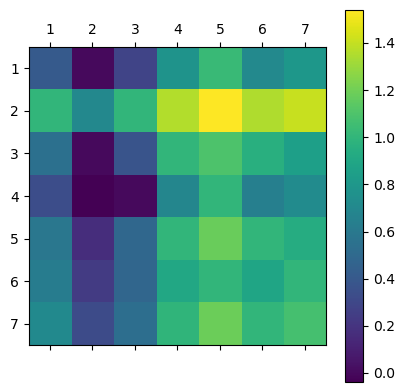

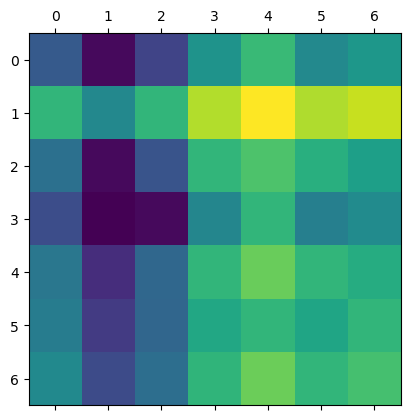

In [ ]:
# Assuming `model` and `testSet` are already defined
output = model(testSet.float()).reshape(num_items, num_items).detach()

# Plot the matrix with axes starting at 1
plt.matshow(output)

# Modify the ticks to start from 1
plt.xticks(range(num_items), range(1, num_items + 1))
plt.yticks(range(num_items), range(1, num_items + 1))

plt.colorbar()  # Optional: to add a color bar for reference
plt.show()

plt.matshow(model(testSet.float()).reshape(num_items,num_items).detach())


Retraining with the entire training data and the exception

In [ ]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset
import itertools

class Ti:
    
    def createOneHot(n, num_items):
        pos = n-1
        oneHot = [0]* num_items
        oneHot[pos] = 1
        return oneHot

    #create individual object vectors all in one array
    def createData(n):
        data = []
        for i in range(n):
            oneHot = [0]*n
            oneHot[i] = 1
            data.append(oneHot)
        return data
    
    #create concatenated vector based on two oneHot vectors from scalars
    def createInput(array):
        inputData = []
        for i in range(len(array) - 1):
            inputData.append(array[i] + array[i+1])
        return inputData
    #create reverse concatenated vector
    def createInputReverse(array):
        inputData = []
        for i in range(len(array) - 1):
            inputData.append(array[i+1] + array[i])
        return inputData
    
    #fully concatenated? 
    def createInputTotal(array):
        input = Ti.createInput(array)
        inputReverse = Ti.createInputReverse(array)
        return input + inputReverse
    
    #creates all labels based on an array of values  
    def createLabels(array):
        forwardArr = Ti.createInput(array)
        reverseArr = Ti.createInputReverse(array)
        forwardLabel = [1] * len(forwardArr)
        reverseLabel = [-1] * len(reverseArr)
        return forwardLabel + reverseLabel 
    
    #creates testset (unused)
    def createTest(array):      
        testSet = []
        for i in array:
            for j in array:
                concatenated = i + j #remove equal vectors
                testSet.append(concatenated)
        return testSet

## TESTING
data = Ti.createData(num_items)
print("Data: ", data)
input = Ti.createInput(data)
print("Input: ", input)
inputReverse = Ti.createInputReverse(data)
print("Input Reverse: ", inputReverse)

inputTotal = Ti.createInputTotal(data)
print("Total Input: ", inputTotal)

labels = Ti.createLabels(inputTotal)
print("Labels: ", labels)

tensorArray = torch.tensor(data)
print(tensorArray)

tensorLabels = torch.tensor(labels)
print('tensorLabels:', tensorLabels)

tensorInputTotal = torch.tensor(inputTotal)
print(tensorInputTotal)

tensorCreateTest = torch.tensor(Ti.createTest(data))
print(tensorCreateTest)


Data:  [[1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1]]
Input:  [[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]]
Input Reverse:  [[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]]
Total Input:  [[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]

In [ ]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset
import itertools
import torch.nn.functional as F

num_items = 7
item_indices = torch.arange(num_items)  # Indices for items 'A', 'B', 'C'
one_hot_vectors = F.one_hot(item_indices, num_classes = num_items) #creates one hot vectors more easily than above in a tensor

testSet = []
testLabels = []
#creates testSet and testLabels more easily
#enumerate returns two values, the index, and the item in the array
#creates a testSet and testLabel for every single permutation of items
for idx_i, i in enumerate(one_hot_vectors):
    for idx_j, j in enumerate(one_hot_vectors):
            concatenated = torch.cat((i,j))
            testSet.append(concatenated.tolist())
            testLabels.append(int(idx_i < idx_j))
            print(idx_i, idx_j)
print('testLabels', testLabels)
print('testSet', testSet)
testSet = torch.tensor(testSet)
testLabels = torch.tensor(testLabels)
inputTotal = torch.tensor(Ti.createInputTotal(one_hot_vectors.tolist()))
labels = torch.tensor(Ti.createLabels(one_hot_vectors.tolist()))

print('One hot vectors: \n', one_hot_vectors)
print('Concatenated Input vectors: \n' ,inputTotal)
print('Labels: \n', labels)
print('Testing Set: \n', testSet)
print('Testing Labels: \n', testLabels)


0 0
0 1
0 2
0 3
0 4
0 5
0 6
1 0
1 1
1 2
1 3
1 4
1 5
1 6
2 0
2 1
2 2
2 3
2 4
2 5
2 6
3 0
3 1
3 2
3 3
3 4
3 5
3 6
4 0
4 1
4 2
4 3
4 4
4 5
4 6
5 0
5 1
5 2
5 3
5 4
5 5
5 6
6 0
6 1
6 2
6 3
6 4
6 5
6 6
testLabels [0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
testSet [[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 0

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torch.optim import Adam

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = inputTotal.float()
        self.labels = labels.float()
        self.test_dataset = testSet.float()

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        # Retrieve data and labels at the specified index
        x = self.data[index]
        y = self.labels[index]
        return x, y

dataset = CustomDataset(inputTotal, labels)
dataloader = DataLoader(dataset, batch_size=28, shuffle=True)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1*(2*num_items), 512),
            nn.ReLU(),
            nn.Linear(512, 1),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits
    
    
model = NeuralNetwork().to(device)
print(model)

loss_fn = nn.MSELoss()
learning_rate = 0.01
epochs = 10000

for epoch in range(epochs):
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(1))  # Make sure y has the same shape as pred

        model.zero_grad()
        loss.backward()

        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{len(dataloader.dataset):>5d}]")

print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

test_dataset = CustomDataset(testSet, testLabels)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

model.eval()
true_labels = []
predictions = []

with torch.no_grad():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        # Store the true labels and predictions
        true_labels.extend(y.tolist())
        predictions.extend(pred.round().tolist())

correct = sum(p == t for p, t in zip(predictions, true_labels))
print(correct)
accuracy = correct / len(true_labels)
print(f"Accuracy: {accuracy:.4f}")

# X = torch.tensor( [0, 0, 0, 0, 0, 0], dtype=torch.float32).unsqueeze(0).to(device)
# logits = model(X)
# predictions = torch.sign(torch.tanh(logits))
# print('prediction:', predictions)



Using cpu device
NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=14, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=1, bias=True)
  )
)
loss: 1.024271  [    0/   12]
loss: 1.015543  [    0/   12]
loss: 1.006959  [    0/   12]
loss: 0.998504  [    0/   12]
loss: 0.990171  [    0/   12]
loss: 0.981951  [    0/   12]
loss: 0.973839  [    0/   12]
loss: 0.965832  [    0/   12]
loss: 0.957924  [    0/   12]
loss: 0.950111  [    0/   12]
loss: 0.942389  [    0/   12]
loss: 0.934758  [    0/   12]
loss: 0.927215  [    0/   12]
loss: 0.919757  [    0/   12]
loss: 0.912384  [    0/   12]
loss: 0.905093  [    0/   12]
loss: 0.897882  [    0/   12]
loss: 0.890749  [    0/   12]
loss: 0.883691  [    0/   12]
loss: 0.876704  [    0/   12]
loss: 0.869789  [    0/   12]
loss: 0.862942  [    0/   12]
loss: 0.856161  [    0/   12]
loss: 0.849446  [    0/   12]
loss: 0.842798  [    0/   12]
loss: 0.836215  [    0/   12]
loss: 0.82

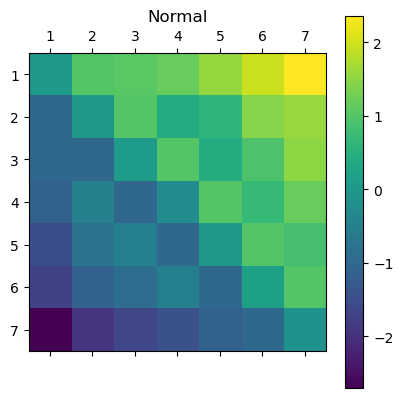

In [ ]:
import matplotlib.pyplot as plt

# Assuming `model` and `testSet` are already defined
output = model(testSet.float()).reshape(num_items, num_items).detach()

# Plot the matrix with axes starting at 1
plt.matshow(output)

plt.title("Normal")
# Modify the ticks to start from 1
plt.xticks(range(num_items), range(1, num_items + 1))
plt.yticks(range(num_items), range(1, num_items + 1))

plt.colorbar()  # Optional: to add a color bar for reference
plt.show()

# plt.matshow(model(testSet.float()).reshape(num_items,num_items).detach())

In [147]:
p = 5
q = 2

def inputTotalExp(num_items,p,q,data):
        inputTotal = Ti.createInputTotal(data)
        labels = Ti.createLabels(Ti.createData(num_items))
        exception = exceptionData(p,q)
        exceptionLabels = [1, -1]

        return inputTotal + exception, labels + exceptionLabels

TotalExceptionData, totalExceptionLabels = inputTotalExp(num_items, p, q, data)
tensorTotalExceptionData = torch.tensor(TotalExceptionData)
tensorTotalExceptionLabels = torch.tensor(totalExceptionLabels)

print(tensorTotalExceptionData)
print(tensorTotalExceptionLabels)

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])
tensor([ 1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1])


In [148]:
class CustomDataset(Dataset):
    def __init__(self, data, labels, test_data=None):
        self.data = data  # No need to call .float() again if they're already tensors
        self.labels = labels
        if test_data is not None:
            self.test_dataset = test_data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [149]:
dataset = CustomDataset(tensorTotalExceptionData, tensorTotalExceptionLabels)
dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)
model.train()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.1)

for epoch in range(epochs):
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(1))  # Make sure y has the same shape as pred

        model.zero_grad()
        loss.backward()

        with torch.no_grad():
            for param in model.linear_relu_stack[2].parameters():
                param -= learning_rate * param.grad

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{len(dataloader.dataset):>5d}]")

    scheduler.step(loss)  # Adjust the learning rate based on the loss

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

print(f"Model structure: {model}\n\n")


for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

test_dataset = CustomDataset(testSet, testLabels)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)


model.eval()
true_labels = []
predictions = []

with torch.no_grad():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        # Store the true labels and predictions
        true_labels.extend(y.tolist())
        predictions.extend(pred.round().tolist())

correct = sum(p == t for p, t in zip(predictions, true_labels))
print(correct)
accuracy = correct / len(true_labels)
print(f"Accuracy: {accuracy:.4f}")


loss: 0.999997  [    0/   12]
Epoch 1, Loss: 3.528409719467163
loss: 0.274246  [    0/   12]
Epoch 2, Loss: 0.6201788187026978
loss: 1.140755  [    0/   12]
Epoch 3, Loss: 0.7615272402763367
loss: 0.513615  [    0/   12]
Epoch 4, Loss: 0.5022825002670288
loss: 0.352420  [    0/   12]
Epoch 5, Loss: 0.7579019665718079
loss: 0.526238  [    0/   12]
Epoch 6, Loss: 0.8117950558662415
loss: 0.502853  [    0/   12]
Epoch 7, Loss: 0.4519028663635254
loss: 0.250317  [    0/   12]
Epoch 8, Loss: 0.30044785141944885
loss: 0.076888  [    0/   12]
Epoch 9, Loss: 0.12605133652687073
loss: 0.231132  [    0/   12]
Epoch 10, Loss: 0.1930394023656845
loss: 0.286296  [    0/   12]
Epoch 11, Loss: 0.3131944537162781
loss: 0.096162  [    0/   12]
Epoch 12, Loss: 0.3106655180454254
loss: 0.135676  [    0/   12]
Epoch 13, Loss: 0.11564680188894272
loss: 0.319289  [    0/   12]
Epoch 14, Loss: 0.047854091972112656
loss: 0.125334  [    0/   12]
Epoch 15, Loss: 0.21626128256320953
loss: 0.010063  [    0/   12]

KeyboardInterrupt: 

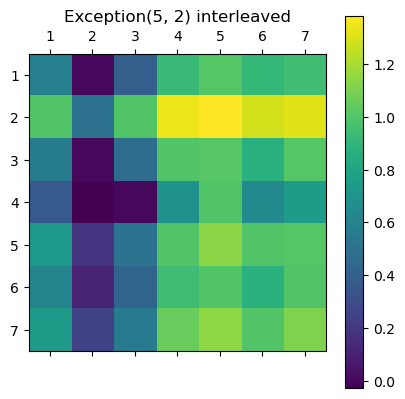

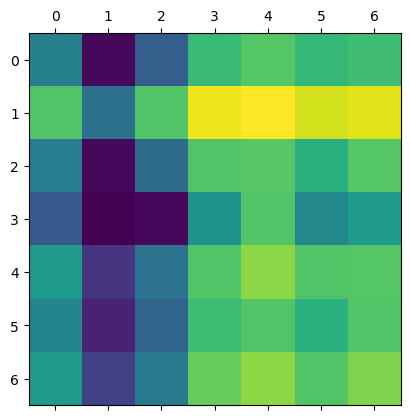

In [150]:
# Assuming `model` and `testSet` are already defined
output = model(testSet.float()).reshape(num_items, num_items).detach()

# Plot the matrix with axes starting at 1
plt.matshow(output)

plt.title(f'Exception{p,q} delayed, interleaved')
# Modify the ticks to start from 1
plt.xticks(range(num_items), range(1, num_items + 1))
plt.yticks(range(num_items), range(1, num_items + 1))

plt.colorbar()  # Optional: to add a color bar for reference
plt.show()

plt.matshow(model(testSet.float()).reshape(num_items,num_items).detach())